### **서울메트로 무임승차 현황과 분석에 따른 조정안** 
#### Background
- 적자가 나면 국민의 세금으로 메꿔야하는 공공기관의 경영성과를 알아보던 중 서울교통공사의 적자폭이 해마다 커지고 있다는 사실을 우연히 접하고 심각성을 느꼈다. 그리고 그 원인이 경영진의 경영에서 비롯된 것이 아닌, 해마다 증가하는 노령인구로 인한 무임승차 비율의 과도한 증가 때문이라는 기사를 읽게 되었다. 때문에 과연 실제 승객 중 무임승차의 비율은 얼마나 되고 이로 인한 손실액의 정도와, 현재의 무임승차 조건에서 인구통계치에 따른 향후 손실액의 변화 추정치를 확인해보고자 이러한 주제를 선정하게 되었다. 이러한 데이터들의 확인과 분석을 통해 적자폭 및 경영 성과의 개선을 알아보는 것이 최종적인 목표이다.

- [100명 중 15명 '무임승차'… 서울 지하철, 손실액 3500억](http://news.hankyung.com/article/2018032127851)

- [서울 지하철 65세 이상 무임승차 손실 2040년엔 연 1조원](http://www.yonhapnews.co.kr/bulletin/2017/04/26/0200000000AKR20170426056500004.HTML)
- [노인 무임승차가 지하철 적자 주 원인?](http://news.jtbc.joins.com/article/article.aspx?news_id=NB11485154)

#### Business Objectives
- 현재 무임승차 중 노인무임승차 횟수를 알아보고, 이에 따른 서울교통공사의 재무제표를 살펴 순손실의 증감 추이를 살펴본다.
- 서울시 인구통계를 통해 앞으로의 추이를 확인 및 서울시 노인 인구 변화와 노인 무임승차간의 상관관계를 분석해본다.
- 현 조건에서 서울교통공사의 적자폭을 개선하려면 무임승차 연령 제한을 얼마로 조정해야하는지 민감도분석을 통해 확인해본다.

#### Business Success Criteria
- 과거 13년부터 서울 노령인구의 변화추이와 지하철 노인 무임승차자, 그리고 수익의 악화간의 관계성을 찾고, 그에 따른 적절한 조정안을
  수치와 함께 제시한다. 하지만 노인 지하철 무임승차는 노인 복지차원에서 실행하기도 하므로 단순 손실로 여겨 적자를 완전 줄이는것은  
  현실적으로 문제가 있으므로, 노인 무임승차로 인한 현 적자규모 중 50%정도를 줄이는 것을 목적으로 한다.

#### Analysis Goals
- 지하철 재무재표, 지하철 무임승차 비율, 서울시 노령인구 추이 등을 분석한 후, 적절한 무임승차 연령 조정안 제시

**제일 먼저, 서울교통공사 운송실적을 확인해보도록 한다.**

In [1]:
#http://pinkwink.kr/959 엑셀 불러오는법 (xlsx)
#openpyxl모듈 설치 요망 'pip install openpyxl'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl as op

In [2]:
%matplotlib inline

In [3]:
y_per=pd.read_excel('The_Performance(13-17).xlsx')
y_per.head(6)

,연도,총 수송인원(천명),운수수입(백만원),계(무임수송인원),노인(천명),장애인(천명),유공자(천명),기본요금(원)
0,2013,2619529,1538879,240321,185426,51158,3737,1050
1,2014,2660907,1567937,248143,194791,49719,3633,1050
2,2015,2640527,1667841,249942,198699,47782,3461,1250
3,2016,2856452,1790798,253566,203837,46349,3380,1250
4,2017,2654317,1687841,258376,210157,44955,3265,1250


In [4]:
# 여기서 필요한 데이터인 노인 무임승차 인원에 대한 정보만 가져오도록 하자.
table=pd.read_excel('The_Performance(13-17).xlsx',
                   header =0,
                   index_col=0,
                   usecols="A,E",
                   convert_float = True)
table.head()

,노인(천명)
연도,
2013,185426
2014,194791
2015,198699
2016,203837
2017,210157


위와 같이 노인무임승차가 꾸준히 증가하는 것을 알수 있다. 그렇지만 눈에 더 잘띄도록 그래프 형식으로 나타내보자

In [5]:
%matplotlib inline
import pandas as pd                
import matplotlib as mpl          
import matplotlib.pyplot as plt   

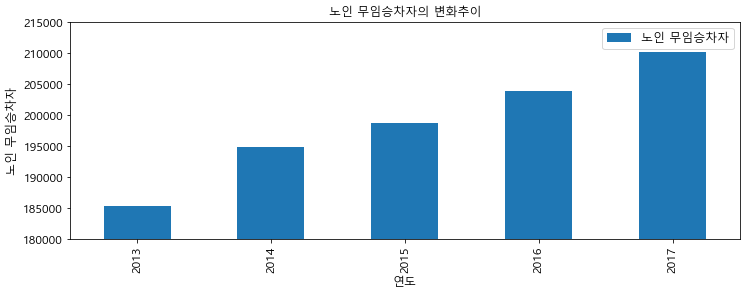

In [6]:
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)
 
ax = table.plot(kind='bar', title='노인 무임승차자의 변화추이', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('연도', fontsize=12)        
ax.set_ylabel('노인 무임승차자', fontsize=12)    
ax.set_ylim(180000,215000)
ax.legend(['노인 무임승차자'], fontsize=12)  

노인 무임승차자는 확연하게 증가하는것을 알았으니, 이제 도시교통공사의 당기순손익도 살펴보자.

In [7]:
data=pd.read_excel('Seoul_financial.xlsx')
data

,연도,당기순손익
0,2013,-417190655022
1,2014,-424530357000
2,2015,-413708634691
3,2016,-385048147441
4,2017,-525362473465


이것 역시 눈에 잘 보이게 그래프로 바꿔본다.

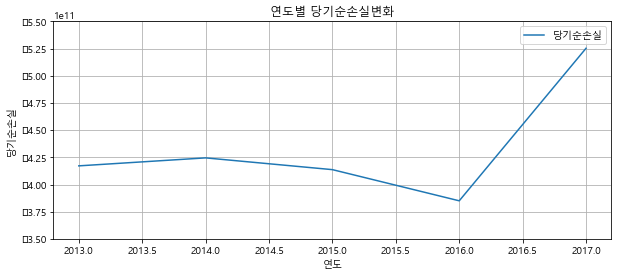

In [8]:
plt.figure(figsize=(10,4))
plt.plot(data.연도, data.당기순손익, label='당기순손실')
plt.xlabel('연도')
plt.ylabel('당기순손실')
plt.title('연도별 당기순손실변화')
plt.grid()
plt.legend()
plt.xlim()
plt.ylim(-350000000000,-550000000000)
plt.show()

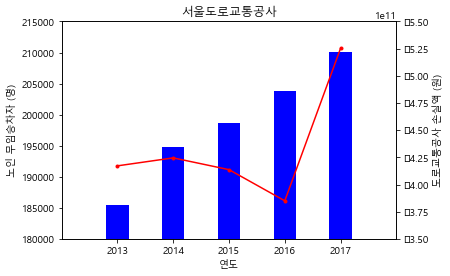

In [9]:
# 이제 이 두개를 한번 합쳐 표시해보자.
import numpy as np
import matplotlib.pyplot as plt


y1_value = (185426,194791,198699,203837,210157)
x_name=('2013','2014','2015','2016','2017')
n_groups = len(x_name)

index = np.arange(n_groups)
bar_width = 0.4

plt.bar(index, y1_value, bar_width,
        tick_label=x_name, align='center',
        color='blue')

plt.xlabel('연도')
plt.ylabel('노인 무임승차자 (명)')
plt.title('서울도로교통공사')
plt.xlim( -1, n_groups)
plt.ylim(180000,215000)

# twin axis ....
plt.twinx()
y2_value = (-417190655022,-424530357000,-413708634691,-385048147441,-525362473465)
plt.plot(index, y2_value, 'r.-')
plt.ylabel('도로교통공사 손실액 (원)')
plt.ylim(-350000000000,-550000000000)

plt.show()

노인무임승차는 꾸준히 증가하는데 비해 도로교통공사의 당기순손실액은 줄어들었다가 다시 늘어나는 경향을 보인다. 
왜 그런지 한번 알아보자

-![연도별 지하철 요금](지하철 요금 변동.jpg)



찾아보니 2015년 6월에 기본요금이 1050원에서 1250원으로 200원, 약 20%가 증가하여 무임승차 인원이 증가함에도 불구하고 일시적 재무성과 개선이 있는것으로 파악되었다.

따라서 앞서 제시한 링크의 기사들의 주장이 일리가 있는 것으로 확인된다. 그렇다면 서울시 노인인구(65세 이상)의 현황은 어떻게 되는가?

In [10]:
# 서울시의 65세 이상인구를 불러와보도록 한다.
y_pop=pd.read_excel('Seoul_Pop_detail(13-17).xlsx')
y_pop

,연도,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80~89세,90~99세,100세 이상
0,2013,96948,99381,80330,71025,71913,70798,84397,67721,58019,57326,50202,45327,41164,38703,32792,158807,22882,603
1,2014,96354,95181,97469,78719,69544,70375,69173,82269,65960,56411,55563,48596,43781,39642,37078,171502,24165,671
2,2015,93155,94226,93095,95131,76905,67767,68503,67211,79812,64075,54571,53650,46780,42051,37947,192801,29719,5037
3,2016,81961,91255,92072,90835,92833,75089,65982,66730,65391,77388,62084,52772,51775,44952,40378,207716,31211,5475
4,2017,114400,80233,89224,89871,88753,90591,73185,64285,64933,63515,74898,60021,50860,49861,43160,223113,33479,5519


In [11]:
# 이렇게 확인해서는 연도별 노인인구 수를 확인하기 어려우므로 연도별로 다 더해보자
y_pop["노인인구합"] = (y_pop['65세']+y_pop['66세']+y_pop['67세']+y_pop['68세']+y_pop['69세']+y_pop['70세']+y_pop['71세']+y_pop['72세']+y_pop['73세']+y_pop['74세']+y_pop['75세']+y_pop['76세']+y_pop['77세']+y_pop['78세']+y_pop['79세']+y_pop['80~89세']+y_pop['90~99세']+y_pop['100세 이상'])
y_pop

,연도,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80~89세,90~99세,100세 이상,노인인구합
0,2013,96948,99381,80330,71025,71913,70798,84397,67721,58019,57326,50202,45327,41164,38703,32792,158807,22882,603,1148338
1,2014,96354,95181,97469,78719,69544,70375,69173,82269,65960,56411,55563,48596,43781,39642,37078,171502,24165,671,1202453
2,2015,93155,94226,93095,95131,76905,67767,68503,67211,79812,64075,54571,53650,46780,42051,37947,192801,29719,5037,1262436
3,2016,81961,91255,92072,90835,92833,75089,65982,66730,65391,77388,62084,52772,51775,44952,40378,207716,31211,5475,1295899
4,2017,114400,80233,89224,89871,88753,90591,73185,64285,64933,63515,74898,60021,50860,49861,43160,223113,33479,5519,1359901


In [12]:
# 이것 역시 필요한 열만 사용해보자
from pandas import Series, DataFrame

frame =DataFrame(y_pop, columns = ['연도', '노인인구합'])
frame

,연도,노인인구합
0,2013,1148338
1,2014,1202453
2,2015,1262436
3,2016,1295899
4,2017,1359901


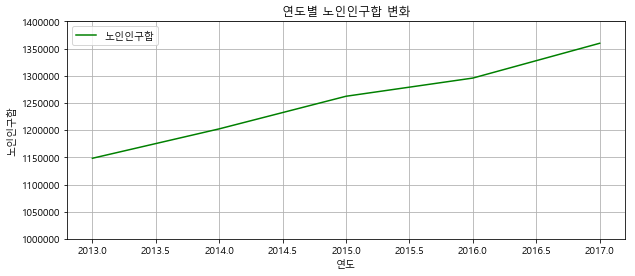

In [13]:
# 변화추이를 그래프로 확인해본다.
plt.figure(figsize=(10,4))
plt.plot(frame.연도, frame.노인인구합,'g', label='노인인구합')
plt.xlabel('연도')
plt.ylabel('노인인구합')
plt.title('연도별 노인인구합 변화')
plt.grid()
plt.legend()
plt.xlim()
plt.ylim(1000000,1400000)
plt.show()

In [14]:
# 우리는 노인인구수와 노인무임승차인원의 상관관계를 확인하기위해 앞에 언급된 두 데이터를 합쳐본다.
data_result = pd.merge(y_per, frame, on="연도")
del data_result['총 수송인원(천명)']
del data_result['운수수입(백만원)']
del data_result['장애인(천명)']
del data_result['계(무임수송인원)']
del data_result['유공자(천명)']
del data_result['기본요금(원)']

data_result

,연도,노인(천명),노인인구합
0,2013,185426,1148338
1,2014,194791,1202453
2,2015,198699,1262436
3,2016,203837,1295899
4,2017,210157,1359901


In [15]:
# 그래프 그리기를 위한 set_index
data_result.set_index('연도', inplace=True)

In [16]:
import numpy as np
np.corrcoef(data_result["노인(천명)"],data_result["노인인구합"])

array([[1.        , 0.99030362],
       [0.99030362, 1.        ]])

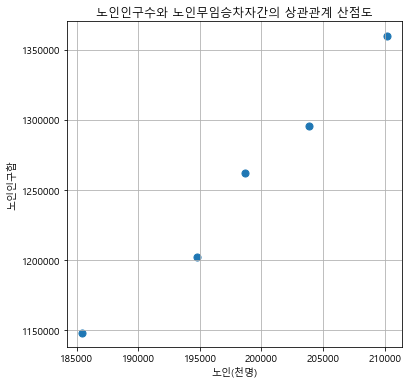

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['노인(천명)'], data_result['노인인구합'], s=50)
plt.xlabel('노인(천명)')
plt.ylabel('노인인구합')
plt.title("노인인구수와 노인무임승차자간의 상관관계 산점도")
plt.grid()
plt.show()

![상관분석1](Corr1.jpg)
![상관분석2](Corr2.jpg)

- 위에서 확인한 것처럼, 둘의 상관관계는 **0.99** 이상이며, 그래프의 모양도 우상향이므로 둘의 상관관계는 매우 높다고 할 수 있다.  
앞으로의 노인인구 추이도 조사하여, 서울교통공사의 노인 무임승차인구 추이 또한 예측해볼 것이다.

In [18]:
#미래 노인인구 추이 데이터를 불러온다. 데이터는 간략화를 위해 1년, 5년, 10년 뒤의 데이터만 확인한다.
Seoul_oldperson=pd.read_excel('Seoul_oldperson.xlsx',
                             usecols="A,G,H,I")
                
Seoul_oldperson

,2018,2022,2027
총인구(명),9721190.0,9596930.0,9505470.0
인구(명): 0-14세,1084446.0,1026260.0,982114.0
인구(명): 15-64세,7287716.0,6951165.0,6509845.0
인구(명): 65세 이상,1349028.0,1619505.0,2013511.0
- 구성비(%): 0-14세,11.2,10.7,10.3
- 구성비(%): 15-64세,75.0,72.4,68.5
- 구성비(%): 65세 이상,13.9,16.9,21.2
노령화지수,124.4,157.8,205.0


미래에도 65세 이상의 노인인구수가 대폭 늘어나고 있다.   
우리가 앞서 확인한 상관관계에 따라 서울교통공사의 노인 무임승차 인구역시 늘어날 것으로 예상할 수 있으며,  
이에따라 서울 교통공사의 경영 성과는 더욱 악화될 것이라고 예측할수 있다.
그렇다면 현재의 요금과 같은 조건하에서 적자폭을 개선하려면 제한 연령을 어떻게 조정해야할지 민감도 분석을 통해 확인해본다.

In [19]:
#엑셀에서 작성한 민감도 분석 결과를 가져오도록 하자.
Sen=pd.read_excel('Sensitibity_Analysis_brief.xlsx', 
                   usecols="A:D",
                   convert_float = True)
Sen

,기본요금,17년 노인 이용횟수,추정손실치,인당 이용횟수
0,1250,210157000,262696250000,154.538455
1,NaN,NaN,NaN,NaN
2,연령,이용횟수,손실액,NaN
3,65세이상,210157000,262696250000,NaN
4,66세이상,1.92478e+08,2.40597e+11,NaN
5,67세이상,1.80079e+08,2.25098e+11,NaN
6,68세이상,1.6629e+08,2.07863e+11,NaN
7,69세이상,1.52402e+08,1.90502e+11,NaN
8,70세이상,1.38686e+08,1.73357e+11,NaN
9,71세이상,1.24686e+08,1.55858e+11,NaN


In [20]:
#가독성을 위해 NaN 값을 제거해보도록 하자.
Sen.fillna(value="")
Sen_a=Sen.fillna(value="")
Sen_a[:1]

,기본요금,17년 노인 이용횟수,추정손실치,인당 이용횟수
0,1250,210157000,262696250000,154.538


In [21]:
#위의 내용을 제외한 연령 제한 조정에 따른 손실액 변화만 따로 분리해본다.
Sen_a2=Sen_a[2:]
Sen_a2

,기본요금,17년 노인 이용횟수,추정손실치,인당 이용횟수
2,연령,이용횟수,손실액,
3,65세이상,210157000,262696250000,
4,66세이상,1.92478e+08,2.40597e+11,
5,67세이상,1.80079e+08,2.25098e+11,
6,68세이상,1.6629e+08,2.07863e+11,
7,69세이상,1.52402e+08,1.90502e+11,
8,70세이상,1.38686e+08,1.73357e+11,
9,71세이상,1.24686e+08,1.55858e+11,
10,72세이상,1.13376e+08,1.4172e+11,
11,73세이상,1.03442e+08,1.29302e+11,


In [22]:
# 맨 위의 행이 제거가 되지 않으므로, 이 부분만 따로 엑셀로 저장 후, 첫 행을 제외하여 불러보자. 이 파일은 한번 생성하고, 재실행시 오류 발생
Sen_a2.to_excel('./test.xlsx',
                sheet_name='Sheet1',
                header=True,
                startrow=1,
                startcol=0,
                engine=None,
                merge_cells=True,
                encoding=None,
                inf_rep='inf',
                verbose=True,
                freeze_panes=None)

In [23]:
Analysis=pd.read_excel('test.xlsx',
                   header =2,
                   index_rows=2,
                   usecols="B:D",
                   convert_float = True)

In [24]:
Analysis

,연령,이용횟수,손실액
0,65세이상,2.101570e+08,2.626962e+11
1,66세이상,1.924778e+08,2.405973e+11
2,67세이상,1.800787e+08,2.250984e+11
3,68세이상,1.662902e+08,2.078627e+11
4,69세이상,1.524017e+08,1.905021e+11
5,70세이상,1.386859e+08,1.733574e+11
6,71세이상,1.246861e+08,1.558576e+11
7,72세이상,1.133762e+08,1.417203e+11
8,73세이상,1.034417e+08,1.293021e+11
9,74세이상,9.340706e+07,1.167588e+11


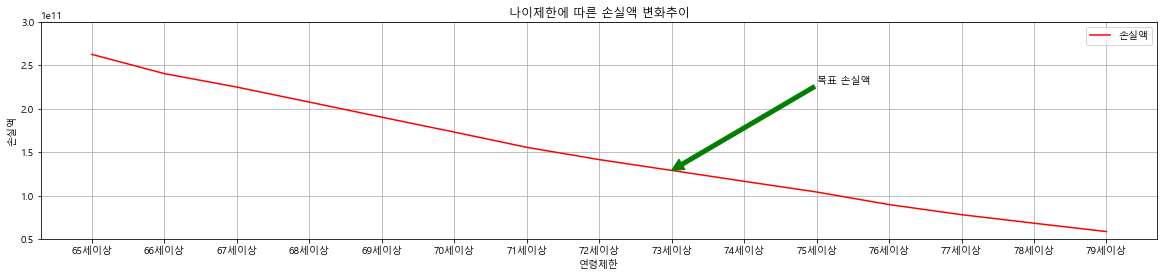

In [25]:
# 위의 결과를 그래프로 나타내고, 우리가 목표로 하는 지점을 찾기 쉽게 표시해보자.
plt.figure(figsize=(20,4))
plt.plot(Analysis.연령, Analysis.손실액,'r', label='손실액')
plt.xlabel('연령제한')
plt.ylabel('손실액')
plt.title('나이제한에 따른 손실액 변화추이')
plt.grid()
plt.legend()
plt.xlim()
plt.ylim(50000000000,300000000000)
plt.annotate('목표 손실액',xy=("73세이상",1.293021e+11),xytext=(10,2.293021e+11),arrowprops={'color':'green'})
plt.show()

- 65세 이후의 이용횟수 및 추정손실치 = '총 이용횟수' - 연령별 정보 * '인당 이용횟수' ('y_pop' 데이터 표 기반, 한계점 참고)

### 결론 및 시사점

지금까지의 데이터를 토대로 보았을 때, 노인들의 무임승차로 인한 **서울교통공사의 적자는 증가** 하고 있다. 또한 고령화 지수와 노인 인구가 증가하고 있는데, 이는 앞으로 지하철 운임의 적자가 계속 증가할 것을 나타낸다고 생각한다.   
  
교통약자에 대한 무임수송은 공익을 담당하고 있는 공기업으로서 당연한 역할이며 이 제도는 지속적으로 시행이 필요한 제도임은 분명하다. 그러나 무임승차로 인한 손실액의 모두를 철도 운영기관에 떠맡김으로써, 국내 지하철 운영기관은 대부분 재정적으로 적자가 발생하여 어려움을 겪고 있으며, 가장 많은 인구가 이용 중인 서울교통공사의 적자폭이 가장 크다.    
  
이렇게 무임승차제도의 문제점에 대해서 분석해보았고, 해결하기 위한 방안을 제안하고자 한다.  
우리가 제시할 해결방안은 **무임승차 노인 연령을 상향 조정하는 방안**이다. 현재 서울교통공사의 적자 중 75% 이상이 노인 무임승차로 인한 것이다. 또한 우리나라의 경우 급격하게 노령화가 되고 있으며, 2027년에는 65세 이상 인구가 22%에 육박해 적자비율은 더 늘어날 것으로 예상된다.     

그렇기에 우리는 초기 분석 목적으로 제시한 노인 무임승차로 인한 적자비율 50%로 조정하려면 무임승차 연령의 시작을 65세가 아니라 **73세로 조정하는 방안**을 도출하게 되었다. 이는 노인연령에 따른 이용횟수의 값과 적자금액의 민감도 분석에 따른 결론이며, 무임승차 제도를 보다 체계적으로 보완하게 된다면 운영기관은 만성적인 운영 적자로부터 재정여건을 호전 시킬 뿐만 아니라 시민복지 향상에도 크게 기여하게 될 것이다.

#### ※한계점
1. 수도권 지하철 노선의 이용자들은 서울시 사람에 국한된 것이 아니고 경기도 등의 여러 지역 사람들의 합이지만, 인구데이터 수집과 데이터 활용성의 어려움으로 인해 서울시 인구만 사용함.    
2. 서울도로교통공사가 공시한 무임수송 손실 금액 데이터가 따로 존재하지 않아, 당기 순 손익 데이터를 조정하여 사용함.   
3. 당기 순 손익 데이터에 부정승차로 인한 적자도 포함되어 있지만 그 수와 그로인한 손실은 파악 불가능하여 제외함.
4. 민감도분석에서의 추정 손실액은 기본요금을 기반으로 환산한 값으로, 첨부한 기사 내용에 제시된 손실액과는 차이를 보이는데,  
   이는 참조한 데이터에 따른 차이일 뿐이다.
5. 추정손실액 계산은 '17년도 총 노인 무임승차자' 대비 '서울시 연령별 인구수'로, 노인 1인당 약 155회 무임승차를 하였다고 가정하였음.